In [1]:
import pandas as pd

Reading PM2.5 data

In [7]:
pm_df = pd.read_csv('/Users/nipun/Downloads/PM25-daily-2017.csv')

Finding unique locations for PM data

In [8]:
pm_df.location.unique()

array(['Income Tax Office', 'Siri Fort', 'Punjabi Bagh', 'Anand Vihar',
       'Mandir Marg', 'US Diplomatic Post: New Delhi', 'R K Puram',
       'Delhi Technological University', 'IHBAS', 'Shadipur',
       'NSIT Dwarka', 'IGI Airport Terminal-3, Delhi - IMD',
       'Burari Crossing, Delhi - IMD', 'Lodhi Road, Delhi - IMD',
       'North Campus, Delhi - IMD', 'CRRI Mathura Road, Delhi - IMD',
       'Pusa, Delhi - IMD', 'Aya Nagar, Delhi - IMD', 'Pusa2 IMD',
       'Punjabi Bagh, Delhi - DPCC',
       'Delhi Technological University, Delhi - CPCB',
       'Sirifort, Delhi - CPCB', 'Shadipur, Delhi - CPCB',
       'NSIT Dwarka, Delhi - CPCB', 'IHBAS, Delhi - CPCB',
       'Income Tax Office, Delhi - CPCB', 'Anand Vihar, Delhi - DPCC',
       'R K Puram, Delhi - DPCC', 'Mandir Marg, Delhi - DPCC'], dtype=object)

In [61]:
modis_df = pd.read_csv("/Users/nipun/Downloads/modis-2017.csv")

In [62]:
modis_df.Location.unique()

array(['Mandir', 'Pusa', 'Shadipur', 'Punjabi Bagh', 'IGI Airport',
       'NSIT Dwarka', 'Aya Nagar', 'CRRI Mathura', 'R K Puram', 'Sirifort',
       'US Diplomatic Post: New Delhi', 'ITO', 'Lodhi Road'], dtype=object)

In [63]:
modis_df.Month

0       4.0
1       4.0
2       4.0
3       4.0
4       4.0
5       4.0
6       4.0
7       4.0
8       4.0
9       4.0
10      4.0
11      4.0
12      4.0
13      1.0
14      1.0
15      1.0
16      1.0
17      1.0
18      1.0
19      1.0
20      1.0
21      1.0
22      1.0
23      1.0
24      1.0
25      1.0
26      4.0
27      4.0
28      4.0
29      4.0
       ... 
9681    2.0
9682    2.0
9683    2.0
9684    2.0
9685    8.0
9686    8.0
9687    8.0
9688    8.0
9689    8.0
9690    8.0
9691    8.0
9692    8.0
9693    8.0
9694    8.0
9695    8.0
9696    8.0
9697    8.0
9698    6.0
9699    6.0
9700    6.0
9701    6.0
9702    6.0
9703    6.0
9704    6.0
9705    6.0
9706    6.0
9707    6.0
9708    6.0
9709    6.0
9710    6.0
Name: Month, Length: 9711, dtype: float64

In [64]:
mapping = {'Income Tax Office':'ITO',
           'Siri Fort':'Sirifort',
           'Punjabi Bagh':'Punjabi Bagh',
           'Mandir Marg':'Mandir',
           'US Diplomatic Post: New Delhi':'US Diplomatic Post: New Delhi',
           'R K Puram':'R K Puram',
           'Shadipur':'Shadipur',
           'NSIT Dwarka':'NSIT Dwarka',
           'IGI Airport Terminal-3, Delhi - IMD':'IGI Airport',
           'Lodhi Road, Delhi - IMD':'Lodhi Road',
           'CRRI Mathura Road, Delhi - IMD':'CRRI Mathura',
           'Pusa, Delhi - IMD':'Pusa',
           'Aya Nagar, Delhi - IMD':'Aya Nagar',
           'Pusa2 IMD':'Pusa',
           'Punjabi Bagh, Delhi - DPCC':'Punjabi Bagh',
           'Sirifort, Delhi - CPCB':'Sirifort',
           'Shadipur, Delhi - CPCB':'Shadipur',
           'NSIT Dwarka, Delhi - CPCB':'NSIT Dwarka',
           'Income Tax Office, Delhi - CPCB': 'ITO',
           'R K Puram, Delhi - DPCC':'R K Puram',
           'Mandir Marg, Delhi - DPCC':'Mandir'
           }

### Getting PM only for the points we care about

In [65]:
pm_df_subset = pm_df[pm_df.location.isin(mapping.keys())]

In [66]:
mapping_diff = {k:v for k,v in mapping.items() if k!=v}
mapping_diff

{'Aya Nagar, Delhi - IMD': 'Aya Nagar',
 'CRRI Mathura Road, Delhi - IMD': 'CRRI Mathura',
 'IGI Airport Terminal-3, Delhi - IMD': 'IGI Airport',
 'Income Tax Office': 'ITO',
 'Income Tax Office, Delhi - CPCB': 'ITO',
 'Lodhi Road, Delhi - IMD': 'Lodhi Road',
 'Mandir Marg': 'Mandir',
 'Mandir Marg, Delhi - DPCC': 'Mandir',
 'NSIT Dwarka, Delhi - CPCB': 'NSIT Dwarka',
 'Punjabi Bagh, Delhi - DPCC': 'Punjabi Bagh',
 'Pusa, Delhi - IMD': 'Pusa',
 'Pusa2 IMD': 'Pusa',
 'R K Puram, Delhi - DPCC': 'R K Puram',
 'Shadipur, Delhi - CPCB': 'Shadipur',
 'Siri Fort': 'Sirifort',
 'Sirifort, Delhi - CPCB': 'Sirifort'}

In [67]:
pm_df_subset = pm_df_subset.replace({'location':mapping_diff})

In [68]:
pm_df_subset.head()

local       value  latitude  longitude location
0  2017-01-01  556.073684   28.6235    77.2494      ITO
1  2017-01-02  264.157895   28.6235    77.2494      ITO
2  2017-01-03  189.456790   28.6235    77.2494      ITO
3  2017-01-04  152.208333   28.6235    77.2494      ITO
4  2017-01-05  201.447917   28.6235    77.2494      ITO

In [69]:
pm_df_subset.index = pd.to_datetime(pm_df_subset.local)

In [70]:
pm_df_subset.head()

local       value  latitude  longitude location
local                                                           
2017-01-01  2017-01-01  556.073684   28.6235    77.2494      ITO
2017-01-02  2017-01-02  264.157895   28.6235    77.2494      ITO
2017-01-03  2017-01-03  189.456790   28.6235    77.2494      ITO
2017-01-04  2017-01-04  152.208333   28.6235    77.2494      ITO
2017-01-05  2017-01-05  201.447917   28.6235    77.2494      ITO

In [71]:
modis_df.index = pd.to_datetime(dict(year=modis_df.Year, month=modis_df.Month, day=modis_df.Day))

In [72]:
modis_df.sort_index(inplace=True)

In [73]:
modis_df = modis_df.drop(["Unnamed: 0","Year","Month","Day","Hour","Minute","Second",
               "Latitude", "Longitude","Deep_Blue_Aerosol_Optical_Depth_550_Land",
               "AOD_550_Dark_Target_Deep_Blue_Combined_QA_Flag",
               "Image_Optical_Depth_Land_And_Ocean"], axis=1)

In [74]:
modis_df.head()

AOD_550_Dark_Target_Deep_Blue_Combined  \
2017-01-01                                 -9999.0   
2017-01-01                                 -9999.0   
2017-01-01                                 -9999.0   
2017-01-01                                 -9999.0   
2017-01-01                                 -9999.0   

            Aerosol_Cloud_Fraction_Land      Location  
2017-01-01                          1.0  CRRI Mathura  
2017-01-01                          1.0  Punjabi Bagh  
2017-01-01                          1.0      Shadipur  
2017-01-01                          1.0          Pusa  
2017-01-01                          1.0        Mandir

In [76]:
pm_df_subset = pm_df_subset.drop(["local","latitude","longitude"], axis=1)

In [81]:
pm_df_subset = pm_df_subset.rename(columns = {'location':'Location','value':'PM25'})

In [82]:
pm_df_subset.head()

PM25 Location
local                          
2017-01-01  556.073684      ITO
2017-01-02  264.157895      ITO
2017-01-03  189.456790      ITO
2017-01-04  152.208333      ITO
2017-01-05  201.447917      ITO

In [84]:
pd.merge(pm_df_subset, modis_df,  right_on='Location')

TypeError: object of type 'NoneType' has no len()

In [86]:
pm_df_subset.head()

PM25 Location
local                          
2017-01-01  556.073684      ITO
2017-01-02  264.157895      ITO
2017-01-03  189.456790      ITO
2017-01-04  152.208333      ITO
2017-01-05  201.447917      ITO

In [95]:
modis_df.index.name='Index'
pm_df_subset.index.name='Index'

In [96]:
pm_df_subset.describe()

PM25
count  3128.000000
mean    116.231007
std     137.926843
min    -999.000000
25%      58.362071
50%     100.865625
75%     166.276256
max    1908.541667

In [101]:
pm_df_subset["Date"] = pm_df_subset.index.values
modis_df["Date"] = modis_df.index.values

In [104]:
pm_df_subset.head()

PM25 Location       Date
Index                                     
2017-01-01  556.073684      ITO 2017-01-01
2017-01-02  264.157895      ITO 2017-01-02
2017-01-03  189.456790      ITO 2017-01-03
2017-01-04  152.208333      ITO 2017-01-04
2017-01-05  201.447917      ITO 2017-01-05

In [105]:
modis_df.head()

AOD_550_Dark_Target_Deep_Blue_Combined  \
Index                                                
2017-01-01                                 -9999.0   
2017-01-01                                 -9999.0   
2017-01-01                                 -9999.0   
2017-01-01                                 -9999.0   
2017-01-01                                 -9999.0   

            Aerosol_Cloud_Fraction_Land      Location       Date  
Index                                                             
2017-01-01                          1.0  CRRI Mathura 2017-01-01  
2017-01-01                          1.0  Punjabi Bagh 2017-01-01  
2017-01-01                          1.0      Shadipur 2017-01-01  
2017-01-01                          1.0          Pusa 2017-01-01  
2017-01-01                          1.0        Mandir 2017-01-01

In [126]:
merged_df = pd.merge(modis_df, pm_df_subset, on =['Date', 'Location'])

merged_df = merged_df[merged_df['AOD_550_Dark_Target_Deep_Blue_Combined']>0.]

In [127]:
merged_df = merged_df[merged_df.PM25>0.]


In [128]:
merged_df.describe()

AOD_550_Dark_Target_Deep_Blue_Combined  Aerosol_Cloud_Fraction_Land  \
count                             1620.000000                  1620.000000   
mean                                 0.518478                     0.093877   
std                                  0.294990                     0.135280   
min                                  0.018000                     0.000000   
25%                                  0.323000                     0.000000   
50%                                  0.476000                     0.027000   
75%                                  0.677000                     0.142000   
max                                  2.058000                     1.000000   

              PM25  
count  1620.000000  
mean    106.997049  
std      64.325631  
min       0.840469  
25%      67.008808  
50%      94.203390  
75%     130.982454  
max    1153.250000

In [123]:
%matplotlib inline

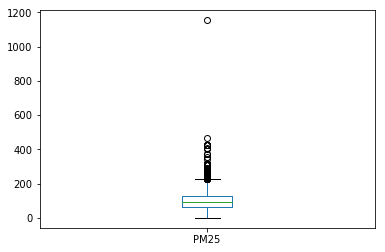

In [129]:
merged_df.PM25.plot(kind='box')

In [147]:
from scipy import stats
import numpy as np
after_od_merged_df = merged_df[(np.abs(stats.zscore(merged_df.PM25)) < 1.2)]

In [148]:
after_od_merged_df.describe()

AOD_550_Dark_Target_Deep_Blue_Combined  Aerosol_Cloud_Fraction_Land  \
count                             1470.000000                  1470.000000   
mean                                 0.518602                     0.093713   
std                                  0.292483                     0.128944   
min                                  0.018000                     0.000000   
25%                                  0.324000                     0.000000   
50%                                  0.477000                     0.032000   
75%                                  0.674250                     0.144000   
max                                  2.058000                     0.887000   

              PM25  
count  1470.000000  
mean     95.423572  
std      36.822127  
min      29.852195  
25%      66.212500  
50%      91.408071  
75%     120.875000  
max     184.108108

In [150]:
after_od_merged_df.rename(columns={'AOD_550_Dark_Target_Deep_Blue_Combined':'AOD',
                                  'Aerosol_Cloud_Fraction_Land':'Cloud_Fraction'}, inplace=True)

/Users/nipun/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [153]:
after_od_merged_df.reindex()

AOD  Cloud_Fraction                       Location       Date  \
26    0.389           0.000                         Mandir 2017-01-02   
29    0.389           0.000                   Punjabi Bagh 2017-01-02   
70    0.730           0.012                       Sirifort 2017-01-05   
81    0.325           0.000                            ITO 2017-01-06   
84    0.325           0.000                       Sirifort 2017-01-06   
85    1.318           0.064                       Sirifort 2017-01-06   
88    0.325           0.000  US Diplomatic Post: New Delhi 2017-01-06   
90    0.880           0.067                         Mandir 2017-01-06   
91    0.325           0.000                         Mandir 2017-01-06   
95    0.325           0.000                   Punjabi Bagh 2017-01-06   
98    0.880           0.067                      R K Puram 2017-01-06   
100   0.325           0.000                      R K Puram 2017-01-06   
101   1.318           0.064                      R K Puram 2017-01-06   
119   0.564           0.167                            ITO 2017-01-08   
121   0.463           0.009                            ITO 2017-01-08   
123   0.463           0.009  US Diplomatic Post: New Delhi 2017-01-08   
125   0.572           0.000  US Diplomatic Post: New Delhi 2017-01-08   
128   0.463           0.009                       Sirifort 2017-01-08   
129   0.564           0.167                       Sirifort 2017-01-08   
130   0.463           0.009                   Punjabi Bagh 2017-01-08   
131   0.572           0.000                   Punjabi Bagh 2017-01-08   
134   0.463           0.009                         Mandir 2017-01-08   
135   0.572           0.000                         Mandir 2017-01-08   
138   0.307           0.330                   Punjabi Bagh 2017-01-09   
140   0.307           0.330                      R K Puram 2017-01-09   
141   0.913           0.064                      R K Puram 2017-01-09   
142   0.307           0.330                       Sirifort 2017-01-09   
143   0.913           0.064                       Sirifort 2017-01-09   
144   0.307           0.330  US Diplomatic Post: New Delhi 2017-01-09   
146   0.307           0.330                            ITO 2017-01-09   
...     ...             ...                            ...        ...   
5841  0.496           0.222                     Lodhi Road 2017-09-28   
5844  0.474           0.000                            ITO 2017-09-28   
5845  0.496           0.222                            ITO 2017-09-28   
5849  0.496           0.222                         Mandir 2017-09-28   
5850  0.474           0.000                         Mandir 2017-09-28   
5851  0.632           0.122                           Pusa 2017-09-29   
5853  0.845           0.017                            ITO 2017-09-29   
5855  0.845           0.017                     Lodhi Road 2017-09-29   
5858  0.845           0.017  US Diplomatic Post: New Delhi 2017-09-29   
5860  0.845           0.017                       Sirifort 2017-09-29   
5862  0.632           0.122                      R K Puram 2017-09-29   
5864  0.568           0.070                      Aya Nagar 2017-09-29   
5866  0.589           0.052                    NSIT Dwarka 2017-09-29   
5868  0.632           0.122                    IGI Airport 2017-09-29   
5870  0.917           0.017                   Punjabi Bagh 2017-09-29   
5872  0.917           0.017                       Shadipur 2017-09-29   
5874  0.845           0.017                         Mandir 2017-09-29   
5876  0.822           0.059                   CRRI Mathura 2017-09-29   
5879  0.400           0.294                       Sirifort 2017-09-30   
5885  0.517           0.094                            ITO 2017-09-30   
5888  0.400           0.294                      R K Puram 2017-09-30   
5890  0.519           0.047                     Lodhi Road 2017-09-30   
5893  0.363           0.222                           Pusa 2017-09

In [152]:
after_od_merged_df.to_csv("pm25-modis.csv")